## 9 seconds(non-overlapping)

In [1]:
import numpy as np
import wfdb as wf
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, AveragePooling1D, Dropout
from keras.utils import np_utils
import tensorflow as tf
#from keras.callbacks import Tensorboard
np.set_printoptions(suppress=True)

trainD = np.load("/home/hsiehch/9s_overlapping/train_data.npy")
trainL = np.load("/home/hsiehch/9s_overlapping/train_label.npy")
validationD = np.load("/home/hsiehch/9s_overlapping/validation_data.npy")
validationL = np.load("/home/hsiehch/9s_overlapping/validation_label.npy")
testD = np.load("/home/hsiehch/9s_overlapping/test_data.npy")
testL = np.load("/home/hsiehch/9s_overlapping/test_label.npy")

trainData = trainD.reshape((trainD.shape[0], trainD.shape[1], 1))
trainLabel = np_utils.to_categorical(trainL, 4)
validationData = validationD.reshape((validationD.shape[0], validationD.shape[1], 1))
validationLabel = np_utils.to_categorical(validationL, 4)
testData = testD.reshape((testD.shape[0], testD.shape[1], 1))
testLabel = np_utils.to_categorical(testL, 4)
print('Train Data:', trainData.shape)
print('Train Label: ', trainLabel.shape)
print('Vali Data: ', validationData.shape)
print('Vali Label: ', validationLabel.shape)
print('Test Data: ', testData.shape)
print('Test Label: ', testLabel.shape)

'''
model = Sequential() 
model.add(Conv1D(filters = 32, kernel_size = 7, input_shape = (trainData.shape[1], 1), activation = "relu"))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 32, kernel_size = 7, activation = "relu"))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 64, kernel_size = 7, activation = "relu"))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 64, kernel_size = 3, activation = "relu"))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))
model.add(Conv1D(filters = 128, kernel_size = 3, activation = "relu"))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 128, kernel_size = 3, activation = "relu"))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))
model.add(Conv1D(filters = 256, kernel_size = 3, activation = "relu"))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 256, kernel_size = 3, activation = "relu"))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))
model.add(Conv1D(filters = 512, kernel_size = 3, activation = "relu"))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))
model.add(Conv1D(filters = 512, kernel_size = 3, activation = "relu"))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(4, activation = "softmax"))
print(model.summary())

model.compile(optimizer ='adam', loss = "categorical_crossentropy", metrics=['accuracy'])
train_history_1 = model.fit(x = trainData, 
                          y = trainLabel,
                          epochs=100,
                          validation_data=(validationData, validationLabel),
                          batch_size=32, # 
                          verbose=1)
'''
model_1 = Sequential()
model_1.add(Conv1D(filters = 128, kernel_size = 32, input_shape = (trainData.shape[1], 1), activation = "relu"))
model_1.add(Dropout(0.5))
model_1.add(MaxPooling1D(pool_size = 128))
model_1.add(Flatten())
model_1.add(Dense(1024, activation = "relu"))
model_1.add(Dense(256, activation = "relu"))
model_1.add(Dense(64, activation = "relu"))
model_1.add(Dense(8, activation = "relu"))
model_1.add(Dense(4, activation = "softmax"))
print(model_1.summary())

model_1.compile(optimizer ='adam', loss = "categorical_crossentropy", metrics=['accuracy'])
train_history_2 = model_1.fit(x = trainData, 
                          y = trainLabel,
                          batch_size=32,
                          epochs=100,
                          verbose=1,
                          validation_data=(validationData, validationLabel),
                          )

print('Finish training!')

import pylab as plt
def history_display(hist, train, validation):
    plt.plot(hist.history[train])
    plt.plot(hist.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
    
def show_plot(flag, hist):
    if flag == 'acc':
        history_display(hist, 'acc', 'val_acc')
    elif flag == 'loss':
        history_display(hist, 'loss', 'val_loss')
    else:
        print('Invalid!')

# show_plot('acc', train_history_1)
# show_plot('loss', train_history_1)
show_plot('acc', train_history_2)
show_plot('loss', train_history_2)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train Data: (28250, 2700, 1)
Train Label:  (28250, 4)
Vali Data:  (11301, 2700, 1)
Vali Label:  (11301, 4)
Test Data:  (16944, 2700, 1)
Test Label:  (16944, 4)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2669, 128)         4224      
_________________________________________________________________
dropout_1 (Dropout)          (None, 2669, 128)         0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 20, 128)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2560)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2622464   
_________________________________________________________________
dense_2 (Dense)              (None, 256)        

Epoch 47/100
28250/28250 [==============================] - 15s 545us/step - loss: 0.1421 - acc: 0.9465 - val_loss: 1.5563 - val_acc: 0.6344
Epoch 48/100
28250/28250 [==============================] - 15s 543us/step - loss: 0.1365 - acc: 0.9493 - val_loss: 1.6339 - val_acc: 0.5910
Epoch 49/100
28250/28250 [==============================] - 15s 538us/step - loss: 0.1339 - acc: 0.9509 - val_loss: 1.7823 - val_acc: 0.5985
Epoch 50/100
28250/28250 [==============================] - 15s 540us/step - loss: 0.1238 - acc: 0.9548 - val_loss: 1.6199 - val_acc: 0.6124
Epoch 51/100
28250/28250 [==============================] - 15s 538us/step - loss: 0.1298 - acc: 0.9518 - val_loss: 1.6852 - val_acc: 0.6264
Epoch 52/100
28250/28250 [==============================] - 15s 539us/step - loss: 0.1149 - acc: 0.9594 - val_loss: 1.7523 - val_acc: 0.5978
Epoch 53/100
28250/28250 [==============================] - 15s 548us/step - loss: 0.1301 - acc: 0.9522 - val_loss: 1.6507 - val_acc: 0.5971
Epoch 54/100


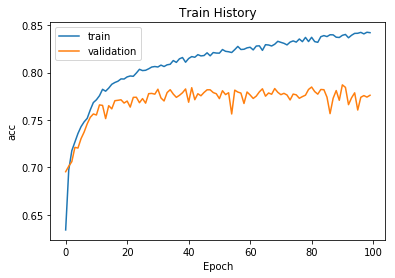

In [2]:
show_plot('acc', train_history_1)

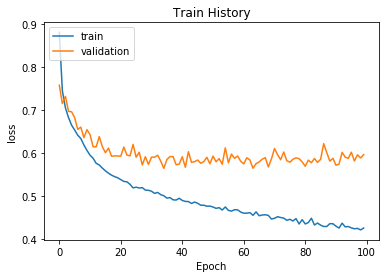

In [3]:
show_plot('loss', train_history_1)

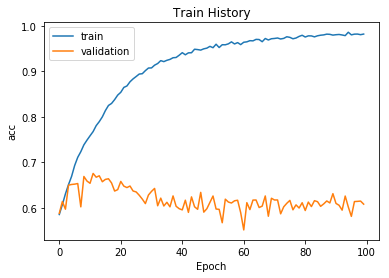

In [2]:
show_plot('acc', train_history_2)

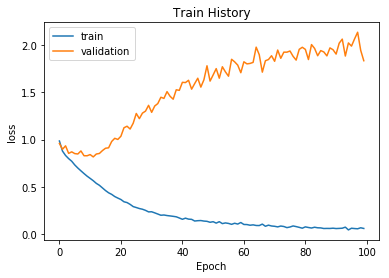

In [3]:
show_plot('loss', train_history_2)

## 9 seconds(overlapping)

In [ ]:
import numpy as np
import wfdb as wf
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D
from keras.utils import np_utils
np.set_printoptions(suppress=True)

import data_preprocessing as dp
tmp = dp.makeData(9, 0.5, 0.2, 0.3, overlap_dot=1350)
trainD, trainL, v_D, v_L, testD, testL = tmp.main()

trainData = trainD.reshape((trainD.shape[0], trainD.shape[1], 1))
trainLabel = np_utils.to_categorical(trainL, 4)
testData = testD.reshape((testD.shape[0], testD.shape[1], 1))
testLabel = np_utils.to_categorical(testL, 4)


model = Sequential() 
model.add(Conv1D(filters = 512, kernel_size = 3, input_shape = (trainData.shape[1], 1), activation = "relu"))
model.add(MaxPooling1D(pool_size = 100))
model.add(Flatten())
model.add(Dense(4, activation = "softmax"))
print(model.summary())

model.compile(optimizer ='adam', loss = "categorical_crossentropy", metrics=['accuracy'])
train_history = model.fit(x = trainData, y = trainLabel, epochs=10, validation_split=0.2, batch_size=100, verbose=2)

print('Finish training!')


import pylab as plt

def history_display(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
    
def show_plot(flag):
    if flag == 'acc':
        history_display(train_history, 'acc', 'val_acc')
    elif flag == 'loss':
        history_display(train_history, 'loss', 'val_loss')
    else:
        print('Invalid!')
     

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


A: 5003
~: 1356
O: 16983
N: 33153
split train data index:  [[0, 2502, 3503, 5003], [5003, 5682, 5954, 6359], [6359, 14851, 18248, 23342], [23342, 39919, 46550, 56495]]
(28250, 2700)
(28250,)
(11301, 2700)
(11301,)
(16944, 2700)
(16944,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2698, 512)         2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 26, 512)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 13312)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 53252     
Total params: 55,300
Trainable params: 55,300
Non-trainable params: 0
_________________________________________________________________
None
Train on 22600 samples, vali

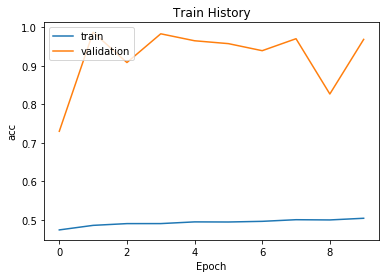

In [2]:
show_plot('acc')

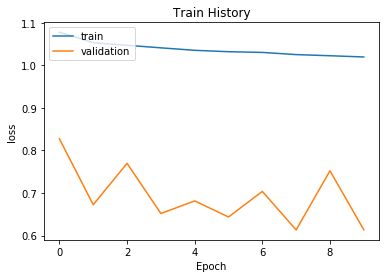

In [3]:
show_plot('loss')

## 30 seconds

In [1]:
import numpy as np
import wfdb as wf
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D
from keras.utils import np_utils
np.set_printoptions(suppress=True)

trainD = np.load("/home/hsiehch/30s/train_data.npy")
trainL = np.load("/home/hsiehch/30s/train_label.npy")
validationD = np.load("/home/hsiehch/30s/validation_data.npy")
validationL = np.load("/home/hsiehch/30s/validation_label.npy")
testD = np.load("/home/hsiehch/30s/test_data.npy")
testL = np.load("/home/hsiehch/30s/test_label.npy")


trainData = trainD.reshape((trainD.shape[0], trainD.shape[1], 1))
trainLabel = np_utils.to_categorical(trainL, 4)
validationData = validationD.reshape((validationD.shape[0], validationD.shape[1], 1))
validationLabel = np_utils.to_categorical(validationL, 4)
testData = testD.reshape((testD.shape[0], testD.shape[1], 1))
testLabel = np_utils.to_categorical(testL, 4)


model = Sequential() 
model.add(Conv1D(filters = 512, kernel_size = 3, input_shape = (trainData.shape[1], 1), activation = "relu"))
model.add(MaxPooling1D(pool_size = 100))
model.add(Flatten())
model.add(Dense(4, activation = "softmax"))
print(model.summary())

model.compile(optimizer ='adam', loss = "categorical_crossentropy", metrics=['accuracy'])
train_history = model.fit(x = trainData, y = trainLabel, epochs=10, validation_data=(validationData, validationLabel), batch_size=100, verbose=2)

print('Finish training!')


import pylab as plt

def history_display(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
    
def show_plot(flag):
    if flag == 'acc':
        history_display(train_history, 'acc', 'val_acc')
    elif flag == 'loss':
        history_display(train_history, 'loss', 'val_loss')
    else:
        print('Invalid!')


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 8998, 512)         2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 89, 512)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 45568)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 182276    
Total params: 184,324
Trainable params: 184,324
Non-trainable params: 0
_________________________________________________________________
None
Train on 5078 samples, validate on 2032 samples
Epoch 1/10


ResourceExhaustedError: OOM when allocating tensor with shape[100,1,8998,512]
	 [[Node: conv1d_1/convolution/Conv2D = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](conv1d_1/convolution/ExpandDims, conv1d_1/convolution/ExpandDims_1)]]
	 [[Node: metrics/acc/Mean/_93 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_501_metrics/acc/Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'conv1d_1/convolution/Conv2D', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.5/dist-packages/tornado/platform/asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.5/asyncio/base_events.py", line 345, in run_forever
    self._run_once()
  File "/usr/lib/python3.5/asyncio/base_events.py", line 1312, in _run_once
    handle._run()
  File "/usr/lib/python3.5/asyncio/events.py", line 125, in _run
    self._callback(*self._args)
  File "/usr/local/lib/python3.5/dist-packages/tornado/platform/asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-68d3a7a838cd>", line 26, in <module>
    model.add(Conv1D(filters = 512, kernel_size = 3, input_shape = (trainData.shape[1], 1), activation = "relu"))
  File "/usr/local/lib/python3.5/dist-packages/keras/models.py", line 467, in add
    layer(x)
  File "/usr/local/lib/python3.5/dist-packages/keras/engine/topology.py", line 617, in __call__
    output = self.call(inputs, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/keras/layers/convolutional.py", line 160, in call
    dilation_rate=self.dilation_rate[0])
  File "/usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py", line 3294, in conv1d
    data_format=tf_data_format)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/nn_ops.py", line 751, in convolution
    return op(input, filter)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/nn_ops.py", line 835, in __call__
    return self.conv_op(inp, filter)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/nn_ops.py", line 499, in __call__
    return self.call(inp, filter)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/nn_ops.py", line 187, in __call__
    name=self.name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/nn_ops.py", line 177, in _conv1d
    data_format=data_format, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/nn_ops.py", line 2204, in conv1d
    data_format=data_format)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gen_nn_ops.py", line 631, in conv2d
    data_format=data_format, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[100,1,8998,512]
	 [[Node: conv1d_1/convolution/Conv2D = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](conv1d_1/convolution/ExpandDims, conv1d_1/convolution/ExpandDims_1)]]
	 [[Node: metrics/acc/Mean/_93 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_501_metrics/acc/Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


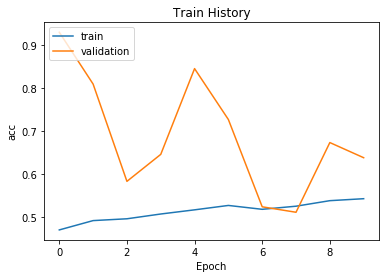

In [2]:
show_plot('acc')

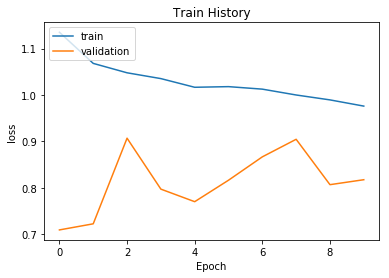

In [3]:
show_plot('loss')

## Check Tensorflow & Keras

In [9]:
import tensorflow as tf
tf.__version__

'1.4.0'

In [1]:
import keras
keras.__version__

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.1.3'